# Classificação de Sentimentos com Modelos Supervisionados

#### 📘 Contexto do Problema

O problema em questão trata-se de **classificação de textos**. A tarefa consiste em analisar um conjunto de **resenhas de livros** e prever se a resenha é **positiva ou negativa**, baseado no conteúdo textual dessas resenhas.

Este tipo de problema é típico em **sistemas de recomendação**, como os utilizados por plataformas como **Amazon, Goodreads ou Google Play Books**, que precisam identificar automaticamente a satisfação do cliente com base em suas avaliações.

O objetivo do modelo é atribuir uma **classe (positiva ou negativa)** a cada resenha, usando o **conteúdo textual** como único atributo. A modelagem deste problema envolve o uso de técnicas de **Processamento de Linguagem Natural (PLN)**, como a transformação do texto em uma forma compreensível por algoritmos de aprendizado de máquina. Para isso, utilizamos vetores de palavras e abordagens como **TF-IDF (Term Frequency - Inverse Document Frequency)** para extrair as características mais relevantes de cada resenha.

O sucesso deste tipo de tarefa tem **aplicações amplas**, desde a **filtragem de conteúdo** até a **recomendação personalizada** e a **análise de sentimentos**, onde a **precisão do modelo** é importante para garantir a fidelidade das análises geradas a partir das resenhas dos usuários.

---

#### 📚 Descrição do Conjunto de Dados: *Amazon Polarity*

O conjunto de dados **Amazon Polarity** é uma coleção de **resenhas de produtos extraídas da Amazon**, com o objetivo de realizar **análise de sentimentos**.

Cada resenha foi classificada como **positiva ou negativa**, com base na opinião expressa pelo usuário:

- `0` → Resenha **negativa**
- `1` → Resenha **positiva**

Este conjunto de dados é amplamente utilizado em tarefas de **classificação de sentimentos** e **análise de texto**, ideal para treinar e testar modelos de aprendizado de máquina com o propósito de **identificar automaticamente a polaridade** de novas resenhas.

---

#### 📌 Características do Conjunto de Dados

- **🔢 Tamanho:**  
  Contém **milhares de resenhas** rotuladas como positivas (1) ou negativas (0).

- **📝 Texto da Resenha:**  
  Cada amostra é composta por um **texto livre**, escrito por um usuário da Amazon. Os textos variam bastante em **tamanho e conteúdo**, abrangendo produtos como **eletrônicos, roupas, acessórios, livros** e muito mais.

- **👍👎 Polaridade:**  
  O modelo deve prever a **opinião (positiva ou negativa)** com base no texto.

---

#### 🛠️ Aplicações

- **🔍 Análise de Sentimentos:**  
  Classificação automática das opiniões dos consumidores, sem leitura manual.

- **🤖 Sistemas de Recomendação:**  
  Avaliações ajudam a ajustar algoritmos de recomendação em e-commerces.

- **📈 Análise de Feedback:**  
  Permite obter insights sobre a **satisfação do cliente** e **melhorias de produto**.

---

#### 🤖 Modelos Utilizados

Os modelos foram treinados para prever a **classe da resenha (positiva ou negativa)**. Os seguintes algoritmos foram avaliados:

- 🔹 **Regressão Logística**
- 🔹 **Máquina de Vetores de Suporte (SVM)**
- 🔹 **XGBoost**
- 🔹 **Random Forest**

---

#### 📊 Avaliação dos Resultados

Os resultados de cada modelo foram avaliados com as seguintes métricas:

- **Acurácia**
- **Precisão**
- **Recall**
- **F1-Score**
- **Curva ROC / AUC**

Essas métricas foram usadas para garantir uma **avaliação equilibrada** do desempenho dos modelos, considerando não apenas a taxa de acertos, mas também a performance em prever corretamente **ambas as classes**.

## Imports

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Avaliação
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Visualização
import matplotlib.pyplot as plt
from datasets import load_dataset

#NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jonnathann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jonnathann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jonnathann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Leitura dataset geral

### Gerando Dataframe

### Pegando uma amostra de dados menor para essa análise e salvando

### Lendo a amostra de dados em um novo DataFrame

In [2]:
df_samples = pd.read_csv('../data/processed/sample_amazon_polarity.csv')
df_samples.head()

,label,title,content
0,1,Road to getting things done,I am a great believer in valueing employees an...
1,0,The Weight Loss Cure,This would be a good book. Good Ideas if every...
2,0,Royal Velvet Pillows,These pillows were over rated and the descript...
3,0,Great Book For Kiddies,Robert Sawyer's books have featured an assortm...
4,0,Digimortal,"You know, Fear Factory used to be my favorite ..."


In [3]:
df_samples['label'].value_counts()

label
1    5000
0    5000
Name: count, dtype: int64

### Verificando dimensões das classes

In [4]:
df_samples.shape
df_samples.label.unique()

array([1, 0])

## Análise Exploratória e Limpeza dos Dados

### Aplicando limpeza dos dados

In [5]:
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [6]:
df_samples['cleaned_title'] = df_samples['title'].apply(clean_text)
df_samples['cleaned_content'] = df_samples['content'].apply(clean_text)

### Concatenando cleaned_title e cleaned_content

In [7]:
df_samples['title_content'] = df_samples['cleaned_title'] + ' ' + df_samples['cleaned_content']
df_samples.head()

,label,title,content,cleaned_title,cleaned_content,title_content
0,1,Road to getting things done,I am a great believer in valueing employees an...,road getting thing done,great believer valueing employee rewarding pro...,road getting thing done great believer valuein...
1,0,The Weight Loss Cure,This would be a good book. Good Ideas if every...,weight loss cure,would good book good idea everyone needed lose...,weight loss cure would good book good idea eve...
2,0,Royal Velvet Pillows,These pillows were over rated and the descript...,royal velvet pillow,pillow rated description amamzon accuratewe di...,royal velvet pillow pillow rated description a...
3,0,Great Book For Kiddies,Robert Sawyer's books have featured an assortm...,great book kiddy,robert sawyer book featured assortment funny e...,great book kiddy robert sawyer book featured a...
4,0,Digimortal,"You know, Fear Factory used to be my favorite ...",digimortal,know fear factory used favorite band album rea...,digimortal know fear factory used favorite ban...


## Pré-Processamento

### Vetorização com TF-IDF

In [8]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df_samples['title_content'])

X_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
X_df.head()

,able,absolutely,account,accurate,across,act,acting,action,actor,actual,...,written,wrong,wrote,year,yes,yet,youll,young,youre,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337877,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129794,0.0


### Separação Treino/Teste

In [9]:
y = df_samples['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelos de classificação

### Regressão Logística

Acurácia: 0.836
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1013
           1       0.84      0.83      0.83       987

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



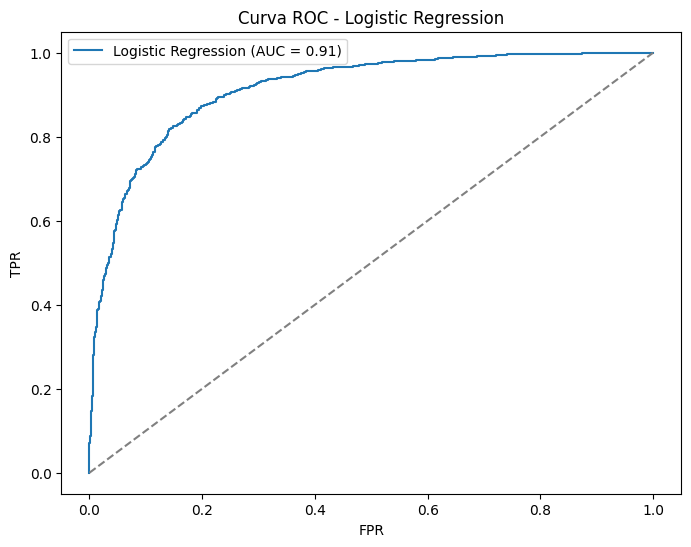

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - Logistic Regression')
plt.legend()
plt.show()

### Support Vector Machine (SVM)

In [ ]:
svm = SVC(random_state=42, probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]

print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - SVM')
plt.legend()
plt.show()

### XGBoost

In [ ]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - XGBoost')
plt.legend()
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()

### 📊 Resultados dos Modelos

#### 📈 Regressão Logística  
- 🔹 **AUC:** 0.91  
- 🎯 **Acurácia:** 0.811  
- 🧪 Classe 0: Precisão = 0.81 | Recall = 0.82 | F1-score = 0.81 | Amostras = 1013  
- 🧪 Classe 1: Precisão = 0.81 | Recall = 0.80 | F1-score = 0.81 | Amostras = 987  
- 📦 Total de amostras: 2000

---

#### 🤖 SVM (Máquina de Vetores de Suporte)  
- 🔹 **AUC:** 0.91  
- 🎯 **Acurácia:** 0.83  
- 🧪 Classe 0: Precisão = 0.82 | Recall = 0.85 | F1-score = 0.84 | Amostras = 1013  
- 🧪 Classe 1: Precisão = 0.84 | Recall = 0.81 | F1-score = 0.82 | Amostras = 987  
- 📦 Total de amostras: 2000

---

#### ⚡ XGBoost  
- 🔹 **AUC:** 0.90  
- 🎯 **Acurácia:** 0.83  
- 🧪 Classe 0: Precisão = 0.82 | Recall = 0.85 | F1-score = 0.84 | Amostras = 1013  
- 🧪 Classe 1: Precisão = 0.84 | Recall = 0.81 | F1-score = 0.82 | Amostras = 987  
- 📦 Total de amostras: 2000

---

#### 🌲 Random Forest  
- 🔹 **AUC:** 0.89  
- 🎯 **Acurácia:** 0.811  
- 🧪 Classe 0: Precisão = 0.82 | Recall = 0.81 | F1-score = 0.81 | Amostras = 1013  
- 🧪 Classe 1: Precisão = 0.80 | Recall = 0.82 | F1-score = 0.81 | Amostras = 987  
- 📦 Total de amostras: 2000

### ✅ Conclusões

- Todos os modelos apresentaram desempenhos bastante próximos, com **AUCs entre 0.89 e 0.91**, indicando boa capacidade discriminativa.

- O **SVM** e o **XGBoost** obtiveram a **maior acurácia (0.83)**, superando levemente a Regressão Logística e a Random Forest (ambas com 0.811).

- A **Regressão Logística**, apesar de simples, teve uma performance competitiva, com AUC de 0.91 e métricas de precisão, recall e F1-score bem equilibradas entre as classes.

- O **Random Forest** teve o menor AUC (0.89), mas ainda assim apresentou desempenho razoável, com métricas equilibradas e acurácia semelhante à da regressão logística.

- **Classe 0 e Classe 1** foram tratadas de forma balanceada por todos os modelos, com **f1-scores iguais ou muito próximos** para ambas.

- Dado o desempenho geral, modelos como **SVM e XGBoost** podem ser preferidos em aplicações onde uma pequena melhoria de performance é crítica. Contudo, a **Regressão Logística** ainda é uma excelente opção quando simplicidade, interpretabilidade e eficiência computacional são prioridades.